In [2]:
import tensorflow as tf
import numpy as np
import os
import cv2
from tensorflow import keras as keras
from tensorflow.keras import *
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


from skimage.io import imread, imshow
from skimage.transform import resize

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

In [3]:
def MergeClass(Mask, n_classes):
    if n_classes == 2:
        for index1 in range(len(Mask)):
            for index2 in range(len(Mask[index1])):
                for index3 in range(len(Mask[index1][index2])):
                    Value = Mask[index1][index2][index3]
                    if Value == 0:
                        Mask[index1][index2][index3] = 0
                    else:
                        Mask[index1][index2][index3] = 1
    if n_classes == 3:
        for index1 in range(len(Mask)):
            for index2 in range(len(Mask[index1])):
                for index3 in range(len(Mask[index1][index2])):
                    Value = Mask[index1][index2][index3]
                    if Value == 0:
                        Mask[index1][index2][index3] = 0
                    elif Value == 128 or Value == 127:
                        Mask[index1][index2][index3] = 1
                    elif Value == 255 or Value == 254:
                        Mask[index1][index2][index3] = 2
        return Mask

In [3]:
y_paths = os.listdir('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels')
y_paths.sort()
nb_img=len(y_paths)
img_height=128
img_width=128
y = np.zeros((nb_img, img_height, img_width,1), dtype=np.uint8)

for j in range(len(y_paths)) : 
    img = imread('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels/' + y_paths[j])
    img = resize(img, (img_height, img_width), mode='constant', preserve_range=True)
    img = np.expand_dims(img, axis=-1)
    y[j]=img

In [13]:
len(y)

66181

In [4]:
from progressbar import ProgressBar

In [5]:
pbar = ProgressBar()
for img in pbar(y):
    np.place(img, img == 127, 1)
    np.place(img, img == 128, 1)
    np.place(img, img == 254, 1)
    np.place(img, img == 255, 1)

100% |########################################################################|


In [7]:
for i in range(len(y)):
    cv2.imwrite('/space/storage/homes/vrv/cellseg-cuda/processed_data/new_data/labels_2_classes/' + str(i).zfill(5)+".pgm", y[i])

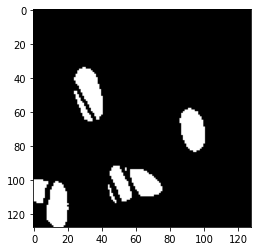

In [8]:
plt.imshow(y[0], cmap='gray')
plt.show()